## TapDanceDecoder: MVP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

**Source:** Small sample set from youtube

In [5]:
tap_df = pd.read_csv('../../../Source/Data/Tap_data_n40.csv')

In [6]:
tap_df.head()

,Unnamed: 0,Path,Labels,0,1,2,3,4,5,6,...,31,32,33,34,35,36,37,38,39,Slope
0,0,../../Source/Shuffle/1/1.wav,1,-293.324979,69.916925,-30.826160,2.049414,-4.496487,3.587130,1.109237,...,-0.636060,-5.408465,-0.498015,-4.975301,-0.122819,-4.887241,1.021584,-3.304852,1.667827,0.000000
1,1,../../Source/Shuffle/1/2.wav,1,-276.266510,68.263278,-36.615667,5.305029,-5.954178,2.666508,3.021715,...,-0.102422,-4.830428,0.547850,-5.434464,1.211024,-4.144923,1.080524,-3.205386,1.662278,0.000000
2,2,../../Source/Shuffle/1/3.wav,1,-274.936810,71.731858,-38.724074,4.732382,-3.488196,2.976912,2.397730,...,0.539130,-3.999879,-0.789776,-5.696328,0.496009,-4.336192,0.904035,-2.891622,1.183886,0.000000
3,3,../../Source/Shuffle/2/1.wav,1,-326.417460,112.223266,-44.161899,28.389066,5.440479,10.000289,-1.217789,...,-1.519514,-2.083231,1.679214,-1.359012,1.875121,-1.500028,1.136799,-1.029760,0.435550,0.000000
4,4,../../Source/Shuffle/3/1.wav,1,-141.855900,26.935705,-72.139592,16.181255,-55.381490,15.658915,-15.245119,...,-0.263565,-3.020770,0.935590,-3.086069,0.824559,-2.220420,2.242528,-3.602058,0.658871,0.011436


## Quick & dirty test with a little bit of data

### LogReg it like you mean it!

In [7]:
data = tap_df.iloc[:,3:].values
labels = tap_df['Labels']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42, stratify=labels)

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [13]:
results = pd.DataFrame()
results['True'] = y_test.values
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [14]:
results

,True,Predict_lr,Prob_0_lr
0,1,1,0.000152
1,0,1,0.286763
2,0,0,0.851082
3,1,1,0.001046
4,0,1,0.000127


In [15]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.6


### YAAAAAAAAASSSSSS QUEEN!

Note: Input data is based on the original (not normalized) files and n_ MFC coefficients

### Visualizing results

In [16]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

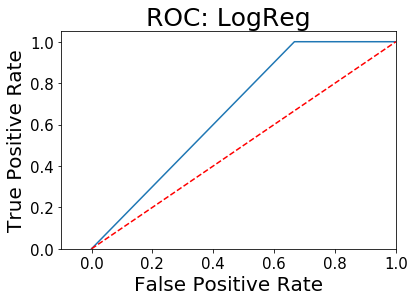

ROC_AUC_Score: 0.6666666666666667


In [17]:
ROC_plot('LogReg',  y_test.values, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=12, max_leaf_nodes=16, n_jobs=-1) # Just using these values from the book
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [36]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [37]:
results

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
0,1,1,0.000152,1,0.416667
1,0,1,0.286763,0,0.500000
2,0,0,0.851082,0,0.833333
3,1,1,0.001046,1,0.250000
4,0,1,0.000127,1,0.250000


In [38]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.8


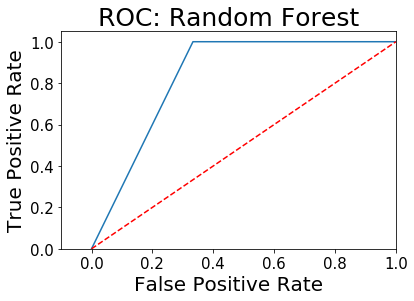

ROC_AUC_Score: 0.8333333333333334


In [39]:
ROC_plot('Random Forest', y_test.values, predict_rf)

In [19]:
#results.to_csv('../../Source/Data/Results_n30.csv')